In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [7]:
import seaborn as sns

C:\Users\HP_15\AppData\Local\Temp\ipykernel_8688\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

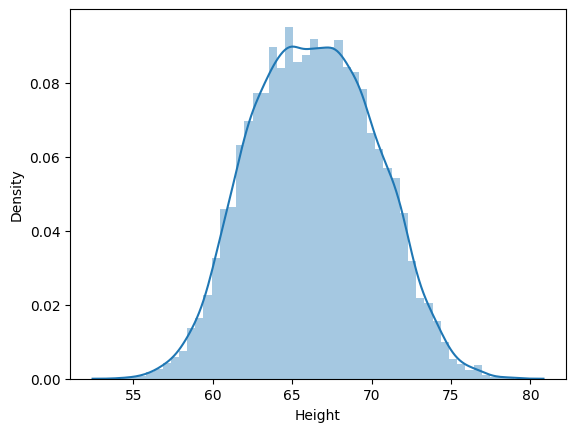

In [8]:
sns.distplot(df['Height'])

In [9]:
#almost normal distribution

<Axes: ylabel='Height'>

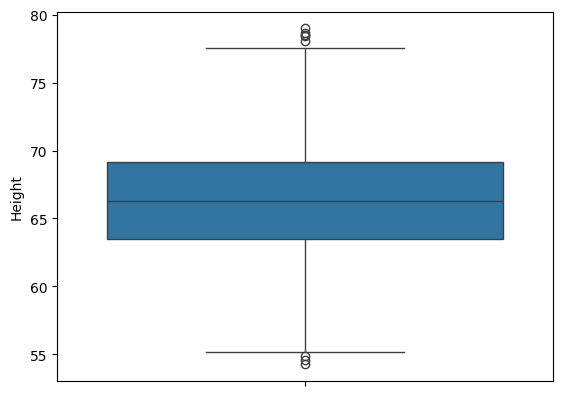

In [10]:
sns.boxplot(df['Height'])

In [11]:
upper_limit=df['Height'].quantile(0.99)

In [13]:
upper_limit

np.float64(74.7857900583366)

In [12]:
lower_limit=df['Height'].quantile(0.01)

In [14]:
lower_limit

np.float64(58.13441158671655)

In [17]:
df[(df['Height']>=upper_limit) | (df['Height']<=lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [20]:
new_df=df[(df['Height']<=upper_limit) & (df['Height']>=lower_limit)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\HP_15\AppData\Local\Temp\ipykernel_8688\1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

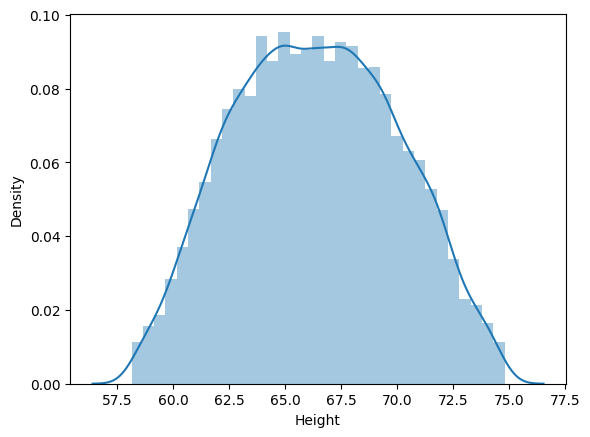

In [22]:
sns.distplot(new_df['Height'])

<Axes: ylabel='Height'>

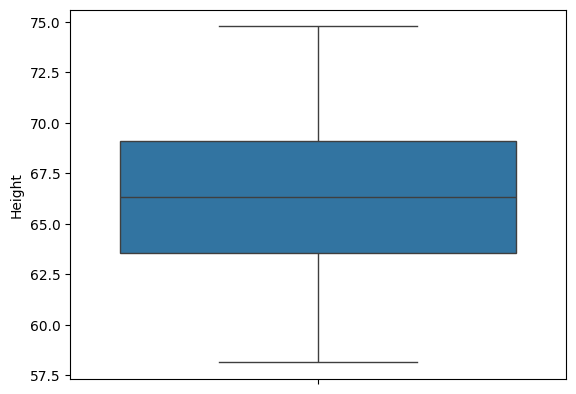

In [23]:
sns.boxplot(new_df['Height'])

In [26]:
#capping --> winsorization
df['Height']=np.where(df['Height']>=upper_limit,
        upper_limit,
        np.where(df['Height']<=lower_limit,
                lower_limit,
                df['Height']))

C:\Users\HP_15\AppData\Local\Temp\ipykernel_8688\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

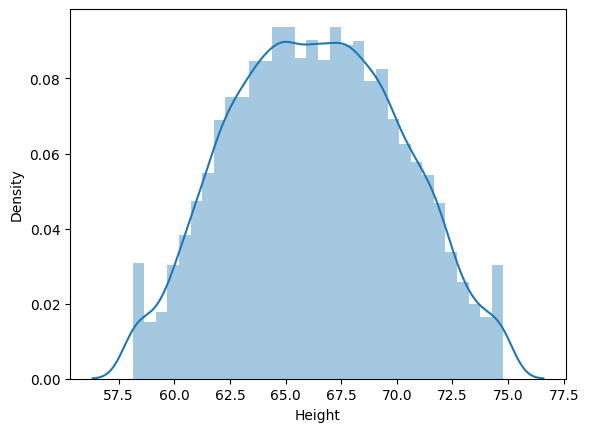

In [27]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

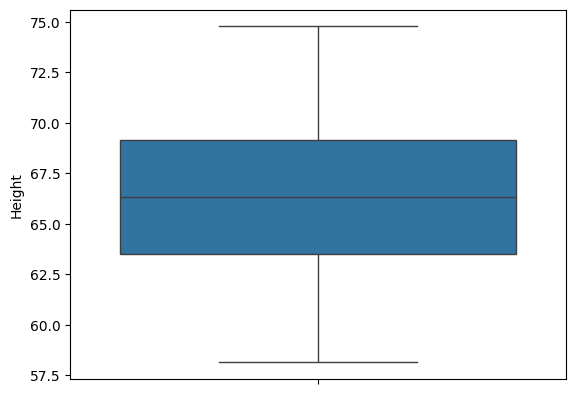

In [28]:
sns.boxplot(df['Height'])